<a href="https://colab.research.google.com/github/fahadmujawar/Interactive-Data-Visualisation-/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coursework 2: Data Visualization


# Import all the required libraries

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

# Load and Prepare Dataset

In [ ]:

#Please upload dataset and paste your path below
df = pd.read_csv('/content/Results_21Mar2022.csv')
# Combine diet group category meat , meat50, meat100 into one category meat
df['diet_group'] = df['diet_group'].replace(['meat50', 'meat100'], 'meat')
# Renaming category Veggie as vegetarian for clarity
df['diet_group'] = df['diet_group'].replace(['veggie'], 'vegetarian')


#Rename columns for layperson-friendly labels
df.rename(columns={
    'mean_ghgs': 'Total GHG Emissions (kg CO₂e/day)',
    'mean_ghgs_ch4': 'Methane Emissions (g/day)',
    'mean_ghgs_n2o': 'Nitrous Oxide Emissions (g/day)',
    'mean_land': 'Land Use (m²/day)',
    'mean_watuse': 'Water Use (L/day)',
    'mean_watscar': 'Water Scarcity Footprint (L/day)',
    'mean_eut': 'Water Pollution Potential (g PO₄eq/day)',
    'mean_bio': 'Biodiversity Impact (species loss ×10⁻¹²/day)',
    'mean_acid': 'Acidification Potential'
}, inplace=True)

#Normalisation
env_columns = [
    'Total GHG Emissions (kg CO₂e/day)',
    'Methane Emissions (g/day)',
    'Nitrous Oxide Emissions (g/day)',
    'Land Use (m²/day)',
    'Water Use (L/day)',
    'Water Scarcity Footprint (L/day)',
    'Water Pollution Potential (g PO₄eq/day)',
    'Biodiversity Impact (species loss ×10⁻¹²/day)',
    'Acidification Potential'
]

scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[env_columns] = scaler.fit_transform(df[env_columns])


# Plotting Enhanced Sunburst Chart

__Insight Gained__<br>
`The sunburst chart reveals that females dominate vegetarian/vegan groups, particularly ages 20-39, indicating demographic shifts in sustainable eating (seen visually in the expanded purple and blue sectors).`

In [ ]:


# Grouping data
sunburst_df = df.groupby(['diet_group', 'sex', 'age_group'])['n_participants'].sum().reset_index()

# Sunburst chart with template
fig_sunburst = px.sunburst(
    sunburst_df,
    path=['diet_group', 'sex', 'age_group'],
    values='n_participants',
    color='diet_group',
    color_discrete_map={
        'vegan': '#1f77b4',
        'vegetarian': '#9467bd',
        'meat': '#d62728',
        'fish': '#2ca02c'
    },
    title="Distribution of Participants by Diet, Gender, and Age"
)

# Layout with template
fig_sunburst.update_layout(
    template="ggplot2",  # Applying ggplot2 styling
    legend_title="Diet Group",
    margin=dict(t=50, l=0, r=0, b=0)
)

fig_sunburst.show()
# Save Sunburst Chart as High-Quality PNG
#Uncomment the below line of code if you want to download the graph as png file
# fig_sunburst.write_image("sunburst_chart.png", format="png", scale=10)  # Higher scale for better resolution


# Heatmap (Normalized Mean Impacts by Diet Group)

__Insight Gained__ <br>
`Meat-heavy diets (even when merged) show consistently higher environmental costs across all indicators (red zone in heatmap and full radial coverage in radar).`

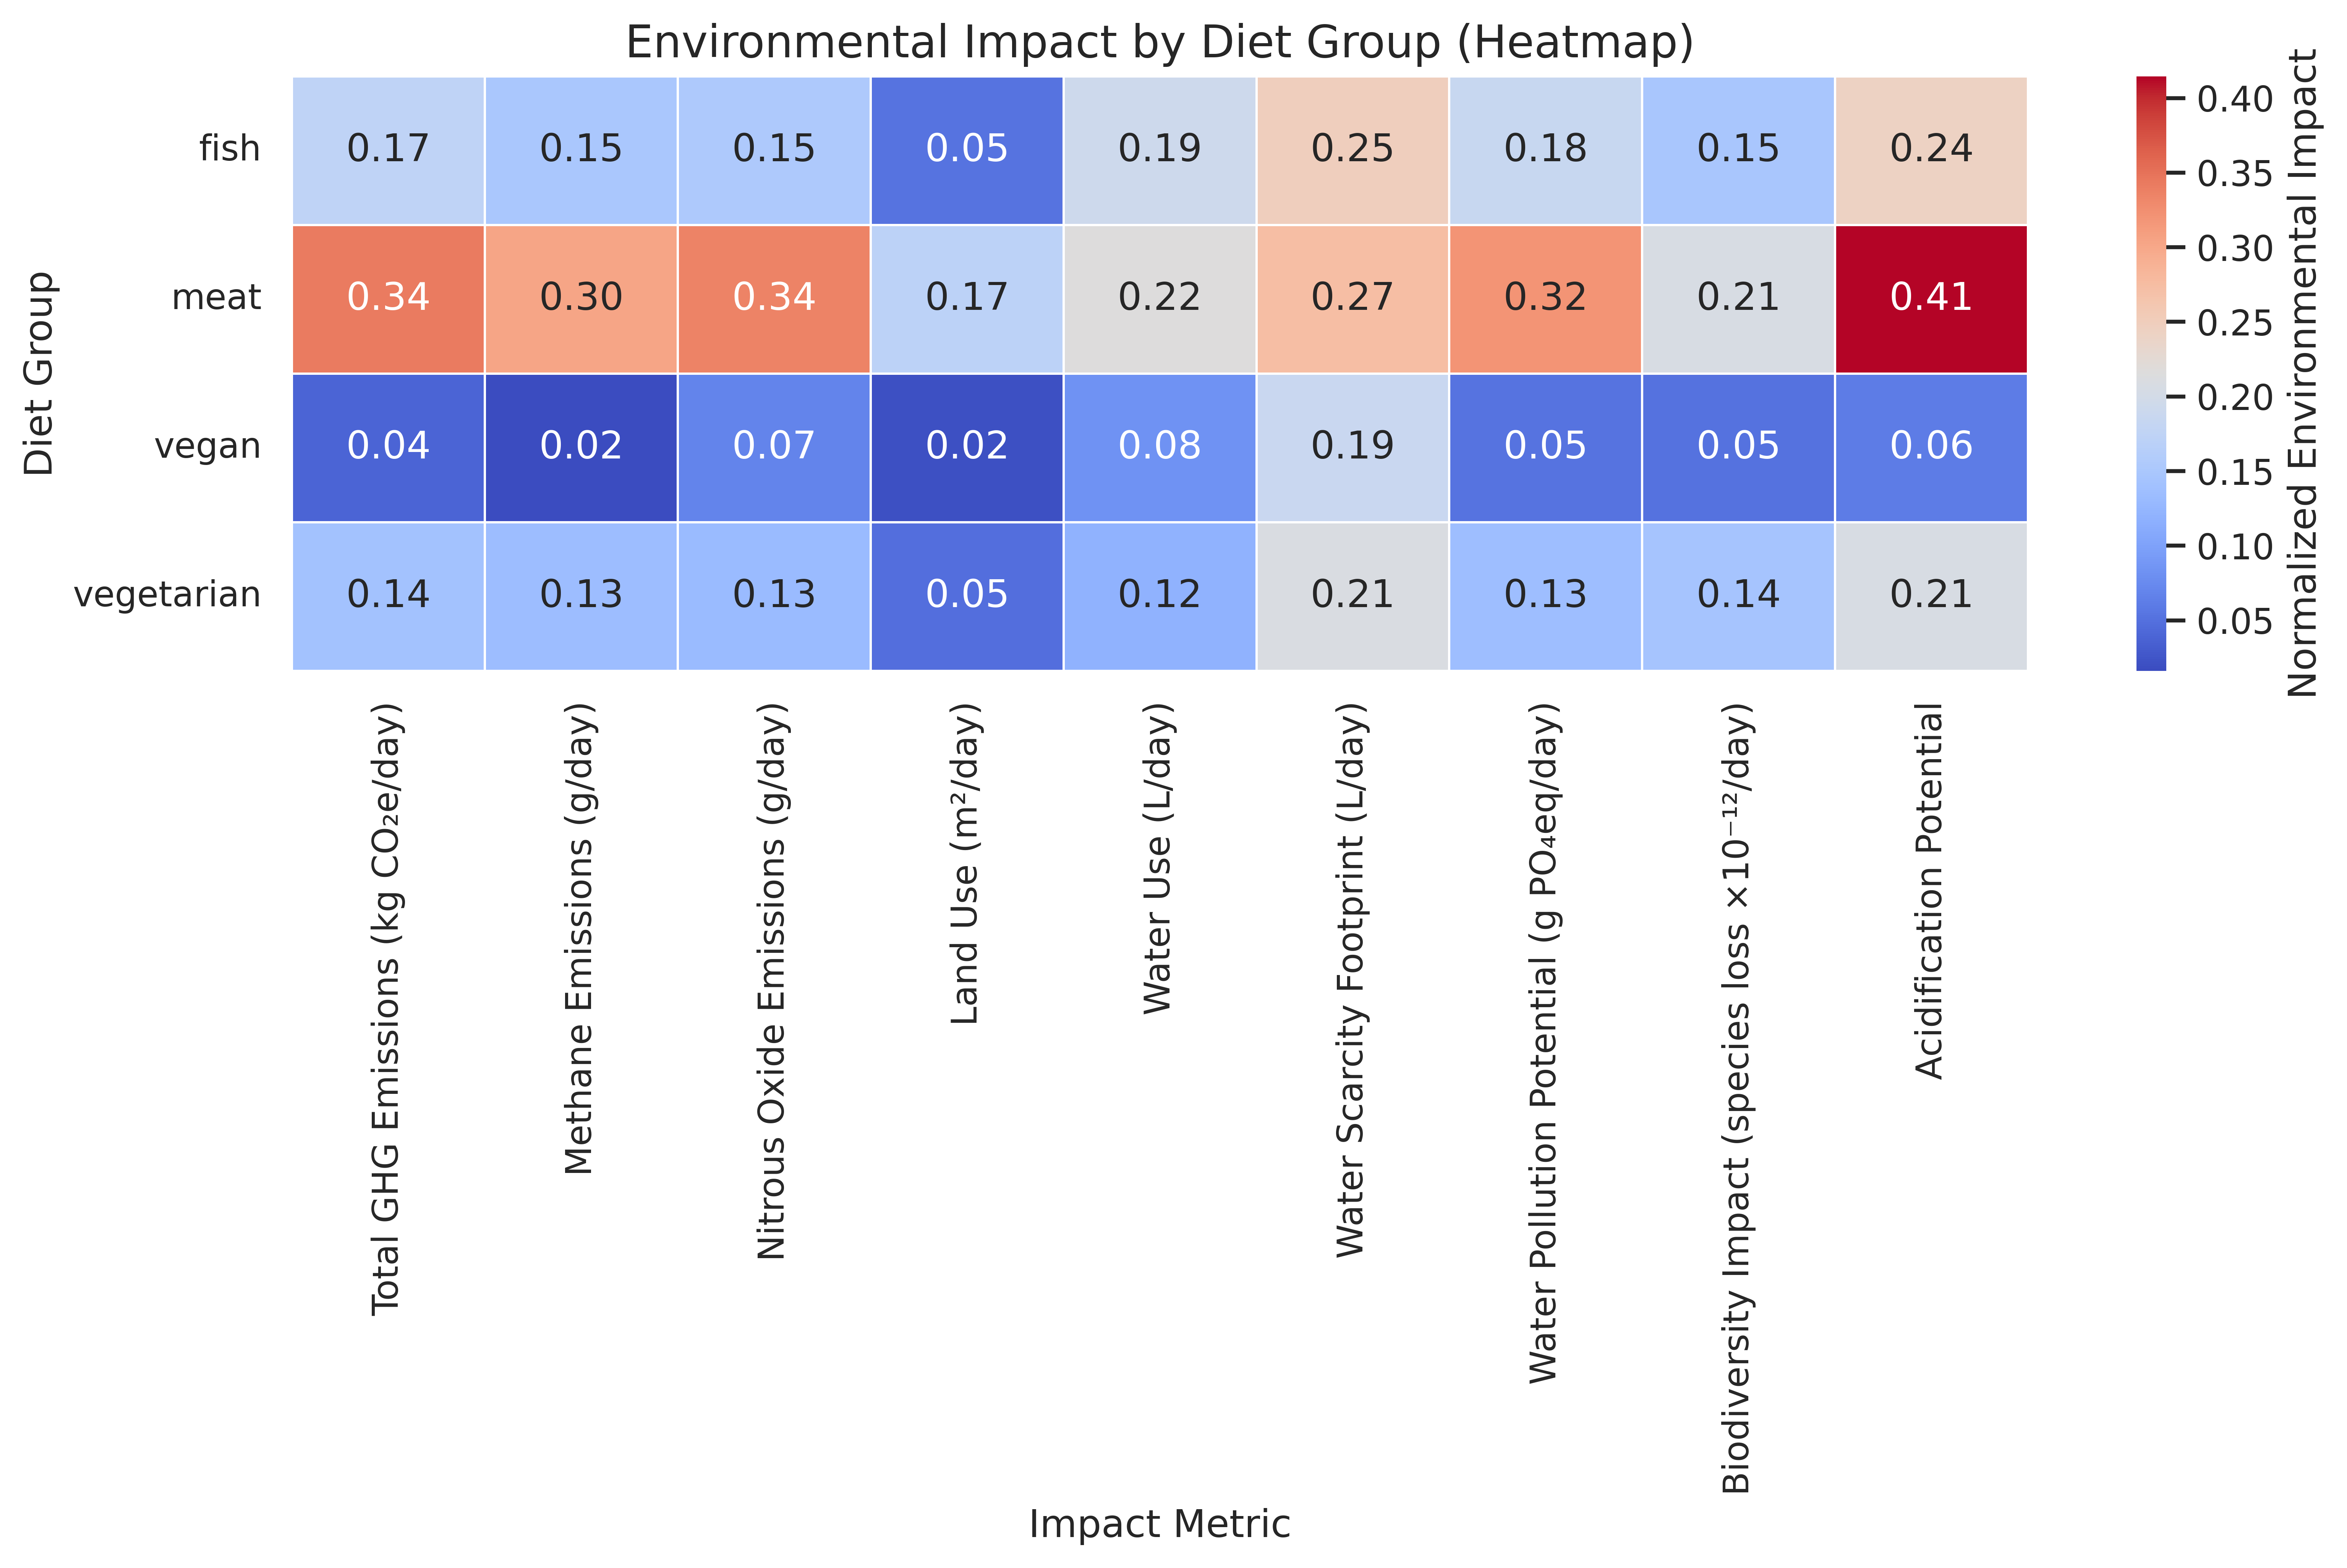

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data
heatmap_data = df_norm.groupby('diet_group')[env_columns].mean()

# Create figure
plt.figure(figsize=(11, 7), dpi=600)  # Increase DPI for higher resolution
sns.set(style="whitegrid")

# Generate heatmap
heatmap = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f",
                      cbar_kws={'label': 'Normalized Environmental Impact'})

# Labels and formatting
plt.title('Environmental Impact by Diet Group (Heatmap)', fontsize=14)
plt.xlabel('Impact Metric')
plt.ylabel('Diet Group')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

#Uncomment the below line of code if you want to download the graph as png file
# plt.savefig("heatmap_high_res.png", dpi=600, bbox_inches='tight')  # High DPI for better resolution

plt.show()


#  Radar Chart (Normalized)

__Insight drawn__<br>
`Fish-based diets, while lower in GHGs, show higher water use and water scarcity footprint`

In [ ]:
# Group by Diet after Normalization
radar_df = df_norm.groupby('diet_group')[env_columns].mean().reset_index()

# Plot Radar Chart
fig_radar = go.Figure()
colors = {'vegan': '#2ca02c', 'vegetarian': '#FFFF00', 'meat': '#FF0000', 'fish': '#4169E1'}
categories = radar_df.columns[1:]

for i, row in radar_df.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=row[1:].values,
        theta=categories,
        fill='toself',
        name=row['diet_group'],
        line=dict(color=colors.get(row['diet_group'], '#333')),
        #marker=dict(symbol='circle', size=8, color=colors.get(row['diet_group'], '#333')),  # Circular markers
        hovertext=[f"{cat}: {val:.2f}" for cat, val in zip(categories, row[1:].values)],
        hoverinfo='text+name'
    ))

#Label and Formatting
fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 0.45])
    ),
    title="Environmental Impact Radar Chart by Diet Type (Normalized [0–1])",
    showlegend=True,
    legend_title_text='Diet Group',
    template='ggplot2'
)

fig_radar.show()

#Uncomment the below line of code if you want to download the graph as png file
# fig_radar.write_image("radar_chart.png", format="png", scale=10)  # Higher scale for better resolution

